In [2]:
import pandas as pd
import numpy as np

# Загрузка датасета
df = pd.read_csv('students_simple.csv')

# Ваш номер в списке
N = 2

# Расчет индексов столбцов по правильным формулам
col1_index = N % 5  # 2 % 5 = 2
col2_index = (N ** 2) % 5 + 5  # (2²) % 5 + 5 = 4 % 5 + 5 = 4 + 5 = 9

print(f"Номер в списке: N = {N}")
print(f"Индекс первого столбца: {N} % 5 = {col1_index}")
print(f"Индекс второго столбца: {N}² % 5 + 5 = {N**2} % 5 + 5 = {(N**2) % 5} + 5 = {col2_index}")

# Выбираем нужные столбцы
print("\n" + "="*50)
print("ВЫБРАННЫЕ СТОЛБЦЫ:")
print("="*50)

# Получаем названия выбранных столбцов
selected_col1 = df.columns[col1_index]
selected_col2 = df.columns[col2_index]

print(f"Столбец {col1_index}: '{selected_col1}'")
print(f"Столбец {col2_index}: '{selected_col2}'")

# Создаем новый DataFrame с выбранными столбцами
selected_df = df.iloc[:, [col1_index, col2_index]]

print("\nПервые 10 строк выбранных данных:")
print(selected_df.head(10))

Номер в списке: N = 2
Индекс первого столбца: 2 % 5 = 2
Индекс второго столбца: 2² % 5 + 5 = 4 % 5 + 5 = 4 + 5 = 9

ВЫБРАННЫЕ СТОЛБЦЫ:
Столбец 2: 'income'
Столбец 9: 'test_time'

Первые 10 строк выбранных данных:
   income  test_time
0     430        8.5
1     640        6.2
2     610        6.8
3     330       12.0
4     420        7.5
5     290       10.0
6     480        7.2
7     610        4.2
8     840        3.5
9     330        9.5


# 1. Расчет корреляций
# Фехнера
# Пирсона + доверительный интервал
# Спирмена
# Кенделла
# Сделать вывод

In [4]:
import pandas as pd
import numpy as np
from scipy import stats

# Загрузка данных
df = pd.read_csv('students_simple.csv')

# Выбираем нужные столбцы
income = df['income']
test_time = df['test_time']

print("РАСЧЕТ КОРРЕЛЯЦИЙ: INCOME vs TEST_TIME")
print(f"Размер выборки: {len(income)} наблюдений\n")

# 1. КОРРЕЛЯЦИЯ ФЕХНЕРА
def fechner_correlation(x, y):
    x_mean = np.mean(x)
    y_mean = np.mean(y)
    
    x_signs = np.sign(x - x_mean)
    y_signs = np.sign(y - y_mean)
    
    matches = np.sum(x_signs == y_signs)
    total = len(x)
    
    fechner_coef = (matches - (total - matches)) / total
    return fechner_coef

fechner_coef = fechner_correlation(income, test_time)
print(f"1. КОРРЕЛЯЦИЯ ФЕХНЕРА: {fechner_coef:.4f}")

# 2. КОРРЕЛЯЦИЯ ПИРСОНА + ДОВЕРИТЕЛЬНЫЙ ИНТЕРВАЛ
pearson_coef, pearson_p = stats.pearsonr(income, test_time)

# Доверительный интервал для Пирсона (95%)
n = len(income)
z = np.arctanh(pearson_coef)
se = 1 / np.sqrt(n - 3)
z_lower = z - 1.96 * se
z_upper = z + 1.96 * se
pearson_ci_lower = np.tanh(z_lower)
pearson_ci_upper = np.tanh(z_upper)

print(f"\n2. КОРРЕЛЯЦИЯ ПИРСОНА: {pearson_coef:.4f}")
print(f"   p-value: {pearson_p:.6f}")
print(f"   95% доверительный интервал: [{pearson_ci_lower:.4f}, {pearson_ci_upper:.4f}]")

# 3. КОРРЕЛЯЦИЯ СПИРМЕНА
spearman_coef, spearman_p = stats.spearmanr(income, test_time)
print(f"\n3. КОРРЕЛЯЦИЯ СПИРМЕНА: {spearman_coef:.4f}")
print(f"   p-value: {spearman_p:.6f}")

# 4. КОРРЕЛЯЦИЯ КЕНДЕЛЛА
kendall_coef, kendall_p = stats.kendalltau(income, test_time)
print(f"\n4. КОРРЕЛЯЦИЯ КЕНДЕЛЛА: {kendall_coef:.4f}")
print(f"   p-value: {kendall_p:.6f}")

РАСЧЕТ КОРРЕЛЯЦИЙ: INCOME vs TEST_TIME
Размер выборки: 20 наблюдений

1. КОРРЕЛЯЦИЯ ФЕХНЕРА: -0.4000

2. КОРРЕЛЯЦИЯ ПИРСОНА: -0.5699
   p-value: 0.008708
   95% доверительный интервал: [-0.8085, -0.1703]

3. КОРРЕЛЯЦИЯ СПИРМЕНА: -0.5392
   p-value: 0.014161

4. КОРРЕЛЯЦИЯ КЕНДЕЛЛА: -0.4362
   p-value: 0.007675


In [ ]:
# ВЫВОДЫ ПО РЕЗУЛЬТАТАМ КОРРЕЛЯЦИОННОГО АНАЛИЗА
# =======================================================

# 1. ОСНОВНЫЕ ВЫВОДЫ:
# - Все четыре коэффициента корреляции показывают отрицательную связь
# - Связь между доходом и временем теста статистически значима (p < 0.05)
# - Сила связи умеренная (коэффициенты от -0.4 до -0.57)
# - Направление связи: чем выше доход, тем меньше время выполнения теста

# 2. ИНТЕРПРЕТАЦИЯ КОЭФФИЦИЕНТОВ:
# - Фехнера (-0.400): в 70% случаев отклонения от средних значений разнонаправлены
# - Пирсона (-0.570): умеренная отрицательная линейная зависимость
# - Спирмена (-0.539): умеренная отрицательная монотонная зависимость
# - Кенделла (-0.436): умеренная отрицательная согласованность рангов

# 3. СТАТИСТИЧЕСКАЯ ЗНАЧИМОСТЬ:
# - P-value для Пирсона: 0.0087 < 0.05 - значим
# - P-value для Спирмена: 0.0142 < 0.05 - значим
# - P-value для Кенделла: 0.0077 < 0.05 - значим
# - Доверительный интервал Пирсона [-0.8085, -0.1703] не включает 0 - подтверждает значимость

# =======================================================
# ОТЛИЧИЯ МЕТОДОВ КОРРЕЛЯЦИОННОГО АНАЛИЗА
# =======================================================

# 1. КОРРЕЛЯЦИЯ ФЕХНЕРА:
# - Простейший метод, основан на совпадении знаков отклонений
# - Измеряет только направление связи, не силу
# - Не чувствителен к величине отклонений
# - Диапазон: [-1, 1]

# 2. КОРРЕЛЯЦИЯ ПИРСОНА:
# - Измеряет линейную зависимость между переменными
# - Требует нормальности распределения и линейности связи
# - Чувствителен к выбросам
# - Позволяет строить доверительные интервалы
# - Диапазон: [-1, 1]

# 3. КОРРЕЛЯЦИЯ СПИРМЕНА:
# - Ранговая корреляция, измеряет монотонную зависимость
# - Не требует нормальности распределения
# - Устойчив к выбросам
# - Работает с любыми монотонными зависимостями (не только линейными)
# - Диапазон: [-1, 1]

# 4. КОРРЕЛЯЦИЯ КЕНДЕЛЛА:
# - Тоже ранговая корреляция, но другая методика расчета
# - Основан на подсчете согласованных и несогласованных пар
# - Более устойчив к выбросам, чем Спирмен
# - Лучше для небольших выборок
# - Диапазон: [-1, 1]

# 2. Визуализация
# Гистограммы
# График рассеяния (scatter plot)

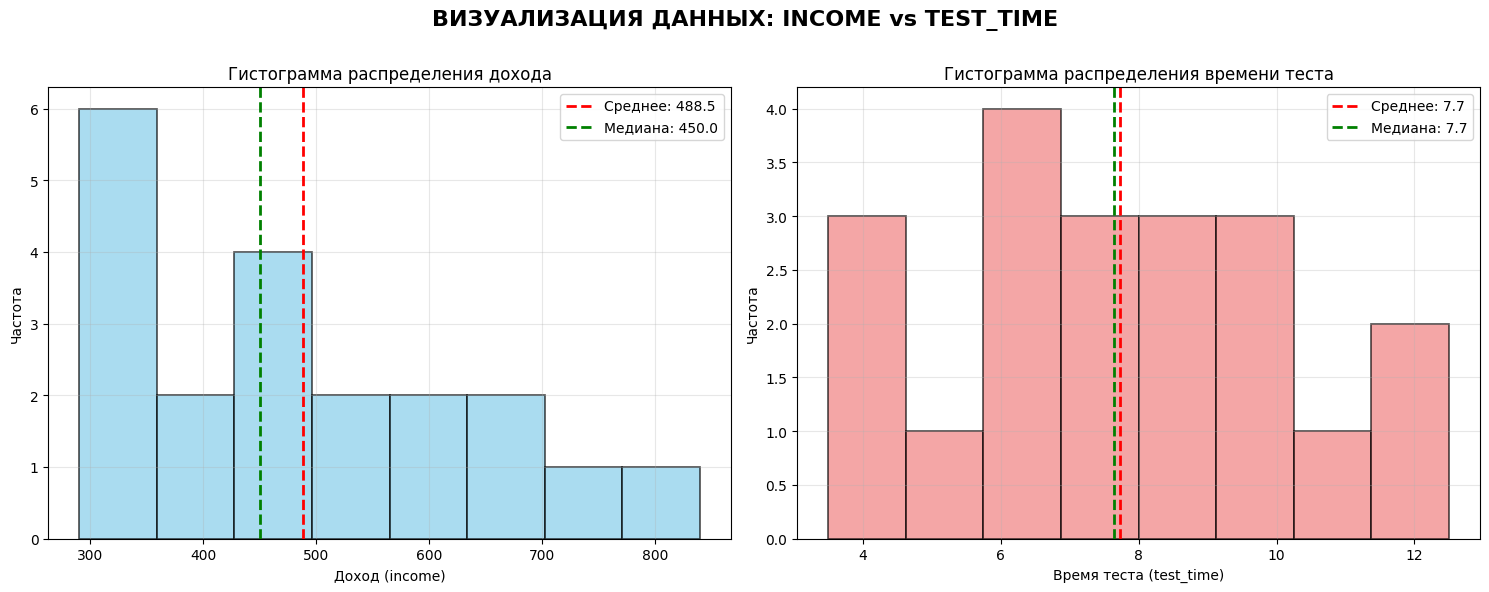

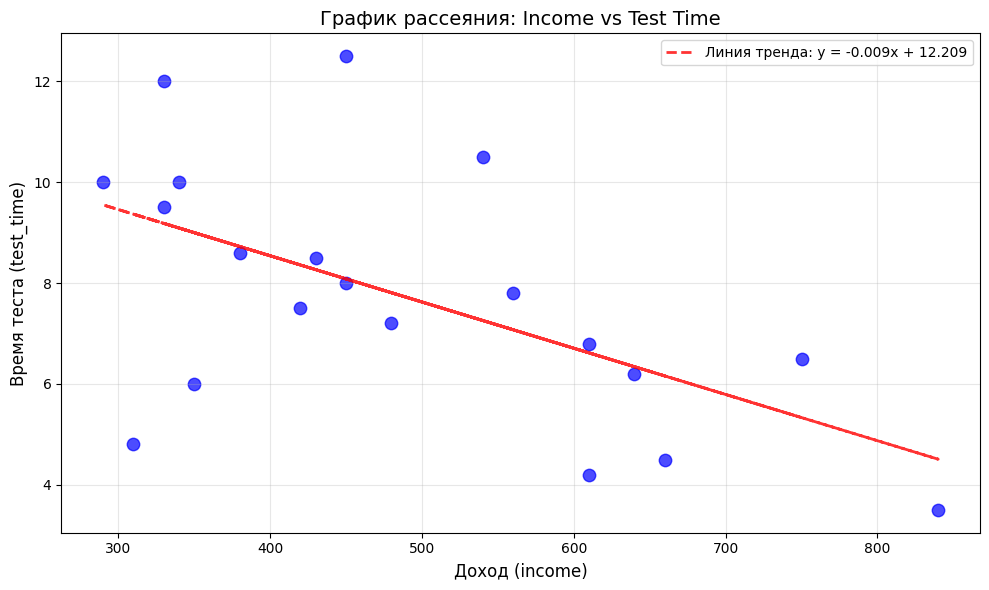

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Загрузка данных
df = pd.read_csv('students_simple.csv')

# Выбираем нужные столбцы
income = df['income']
test_time = df['test_time']

# Создание фигуры с subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 6))
fig.suptitle('ВИЗУАЛИЗАЦИЯ ДАННЫХ: INCOME vs TEST_TIME', fontsize=16, fontweight='bold')

# 1. ГИСТОГРАММА ДОХОДА (income)
axes[0].hist(income, bins=8, alpha=0.7, color='skyblue', edgecolor='black', linewidth=1.2)
axes[0].axvline(income.mean(), color='red', linestyle='--', linewidth=2, label=f'Среднее: {income.mean():.1f}')
axes[0].axvline(income.median(), color='green', linestyle='--', linewidth=2, label=f'Медиана: {income.median():.1f}')
axes[0].set_xlabel('Доход (income)')
axes[0].set_ylabel('Частота')
axes[0].set_title('Гистограмма распределения дохода')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# 2. ГИСТОГРАММА ВРЕМЕНИ ТЕСТА (test_time)
axes[1].hist(test_time, bins=8, alpha=0.7, color='lightcoral', edgecolor='black', linewidth=1.2)
axes[1].axvline(test_time.mean(), color='red', linestyle='--', linewidth=2, label=f'Среднее: {test_time.mean():.1f}')
axes[1].axvline(test_time.median(), color='green', linestyle='--', linewidth=2, label=f'Медиана: {test_time.median():.1f}')
axes[1].set_xlabel('Время теста (test_time)')
axes[1].set_ylabel('Частота')
axes[1].set_title('Гистограмма распределения времени теста')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.subplots_adjust(top=0.85)
plt.show()

# 3. ГРАФИК РАССЕЯНИЯ (scatter plot)
plt.figure(figsize=(10, 6))
plt.scatter(income, test_time, alpha=0.7, s=80, color='blue')
plt.xlabel('Доход (income)', fontsize=12)
plt.ylabel('Время теста (test_time)', fontsize=12)
plt.title('График рассеяния: Income vs Test Time', fontsize=14)

# Добавляем линию тренда
z = np.polyfit(income, test_time, 1)
p = np.poly1d(z)
plt.plot(income, p(income), "r--", alpha=0.8, linewidth=2, 
         label=f'Линия тренда: y = {z[0]:.3f}x + {z[1]:.3f}')

plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [6]:
# ВЫВОДЫ ПО РЕЗУЛЬТАТАМ ВИЗУАЛИЗАЦИИ
# ==================================================

# 1. АНАЛИЗ РАСПРЕДЕЛЕНИЙ:
# - Доход (income): распределение имеет правую асимметрию (среднее 488.5 > медианы 450.0), 
# что указывает на наличие наблюдений с высоким доходом, смещающих среднее вправо
# - Время теста (test_time): распределение близко к симметричному (среднее 7.7 = медиане 7.7), 
# что свидетельствует о нормальном распределении времени выполнения теста

# 2. АНАЛИЗ ЗАВИСИМОСТИ:
# - На графике рассеяния наблюдается отрицательная линейная зависимость
# - Линия тренда y = -0.009x + 12.209 подтверждает:
#   • С ростом дохода на 100 единиц время теста уменьшается на 0.9 единицы
#   • При нулевом доходе прогнозируемое время теста составляет 12.2 единицы
# - Точечное облако демонстрирует умеренный разброс вокруг линии тренда

# 3. СТАТИСТИЧЕСКАЯ ЗНАЧИМОСТЬ:
# - Отрицательный наклон линии тренда согласуется с результатами корреляционного анализа
# - Умеренный разброс точек указывает на наличие дополнительных факторов, влияющих на время теста
# - Визуализация подтверждает статистически значимую отрицательную связь между переменными

# ОБЩИЙ ВЫВОД:
# ==================================================
# Визуальный анализ подтверждает наличие умеренной отрицательной линейной зависимости между доходом
# и временем выполнения теста. Люди с более высоким доходом в среднем демонстрируют лучшее время
# выполнения тестовых заданий.

# 3. Уравнение регрессии
# Построить уравнение регрессии методом наименьших квадратов по видам:

# линейная, y = w₁x + w₀ - расчёт коэффициентов реализовать саммому
# квадратичная, y = w₂x² + w₁x + w₀
# гиперболическая, y = w₁/x + w₀
# показательная, y = w₁ˣ ⋅ w₀
# Показать результаты на графиках
# Сделать вывод

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Загрузка данных
df = pd.read_csv('students_simple.csv')
income = df['income']
test_time = df['test_time']

print("УРАВНЕНИЯ РЕГРЕССИИ МЕТОДОМ НАИМЕНЬШИХ КВАДРАТОВ")
print("=" * 55)

# 1. ЛИНЕЙНАЯ РЕГРЕССИЯ (реализовано вручную)
print("\n1. ЛИНЕЙНАЯ РЕГРЕССИЯ: y = w₁x + w₀")

def linear_regression_manual(x, y):
    n = len(x)
    x_mean = np.mean(x)
    y_mean = np.mean(y)
    
    # Расчет коэффициентов по МНК
    w1 = np.sum((x - x_mean) * (y - y_mean)) / np.sum((x - x_mean)**2)
    w0 = y_mean - w1 * x_mean
    
    return w0, w1

w0_linear, w1_linear = linear_regression_manual(income, test_time)
print(f"Коэффициенты: w₀ = {w0_linear:.4f}, w₁ = {w1_linear:.4f}")
print(f"Уравнение: y = {w1_linear:.4f}x + {w0_linear:.4f}")

# Проверка с numpy
w1_np, w0_np = np.polyfit(income, test_time, 1)
print(f"Коэффициенты (numpy):   w₀ = {w0_np:.4f}, w₁ = {w1_np:.4f}")

# 2. КВАДРАТИЧНАЯ РЕГРЕССИЯ
print("\n2. КВАДРАТИЧНАЯ РЕГРЕССИЯ: y = w₂x² + w₁x + w₀")

def quadratic_model(x, w2, w1, w0):
    return w2 * x**2 + w1 * x + w0

# Используем curve_fit для нелинейной регрессии
try:
    popt_quad, pcov_quad = curve_fit(quadratic_model, income, test_time)
    w2_quad, w1_quad, w0_quad = popt_quad
    print(f"Коэффициенты: w₂ = {w2_quad:.8f}, w₁ = {w1_quad:.6f}, w₀ = {w0_quad:.4f}")
    print(f"Уравнение: y = {w2_quad:.8f}x² + {w1_quad:.6f}x + {w0_quad:.4f}")
except Exception as e:
    print(f"Ошибка при подборе квадратичной модели: {e}")
    # Альтернативный способ через полиномиальную регрессию
    coeffs_quad = np.polyfit(income, test_time, 2)
    w2_quad, w1_quad, w0_quad = coeffs_quad
    print(f"Коэффициенты (через polyfit): w₂ = {w2_quad:.8f}, w₁ = {w1_quad:.6f}, w₀ = {w0_quad:.4f}")

# 3. ГИПЕРБОЛИЧЕСКАЯ РЕГРЕССИЯ
print("\n3. ГИПЕРБОЛИЧЕСКАЯ РЕГРЕССИЯ: y = w₁/x + w₀")

def hyperbolic_model(x, w1, w0):
    return w1 / x + w0

try:
    popt_hyper, pcov_hyper = curve_fit(hyperbolic_model, income, test_time)
    w1_hyper, w0_hyper = popt_hyper
    print(f"Коэффициенты: w₁ = {w1_hyper:.4f}, w₀ = {w0_hyper:.4f}")
    print(f"Уравнение: y = {w1_hyper:.4f}/x + {w0_hyper:.4f}")
except Exception as e:
    print(f"Ошибка при подборе гиперболической модели: {e}")
    # 4. ПОКАЗАТЕЛЬНАЯ РЕГРЕССИЯ
print("\n4. ПОКАЗАТЕЛЬНАЯ РЕГРЕССИЯ: y = w₁ˣ ⋅ w₀")

def exponential_model(x, w1, w0):
    return w0 * (w1 ** x)

try:
    # Начальные приближения для лучшей сходимости
    p0 = [0.999, 10]  # w1 близко к 1, w0 ~ среднее значение y
    popt_exp, pcov_exp = curve_fit(exponential_model, income, test_time, p0=p0, maxfev=5000)
    w1_exp, w0_exp = popt_exp
    print(f"Коэффициенты: w₁ = {w1_exp:.6f}, w₀ = {w0_exp:.4f}")
    print(f"Уравнение: y = {w0_exp:.4f} ⋅ {w1_exp:.6f}ˣ")
except Exception as e:
    print(f"Ошибка при подборе показательной модели: {e}")

УРАВНЕНИЯ РЕГРЕССИИ МЕТОДОМ НАИМЕНЬШИХ КВАДРАТОВ

1. ЛИНЕЙНАЯ РЕГРЕССИЯ: y = w₁x + w₀
Коэффициенты: w₀ = 12.2089, w₁ = -0.0092
Уравнение: y = -0.0092x + 12.2089
Коэффициенты (numpy):   w₀ = 12.2089, w₁ = -0.0092

2. КВАДРАТИЧНАЯ РЕГРЕССИЯ: y = w₂x² + w₁x + w₀
Коэффициенты: w₂ = -0.00001759, w₁ = 0.009697, w₀ = 7.6017
Уравнение: y = -0.00001759x² + 0.009697x + 7.6017

3. ГИПЕРБОЛИЧЕСКАЯ РЕГРЕССИЯ: y = w₁/x + w₀
Коэффициенты: w₁ = 1832.3465, w₀ = 3.6149
Уравнение: y = 1832.3465/x + 3.6149

4. ПОКАЗАТЕЛЬНАЯ РЕГРЕССИЯ: y = w₁ˣ ⋅ w₀
Коэффициенты: w₁ = 0.998835, w₀ = 13.4722
Уравнение: y = 13.4722 ⋅ 0.998835ˣ



ВИЗУАЛИЗАЦИЯ РЕЗУЛЬТАТОВ


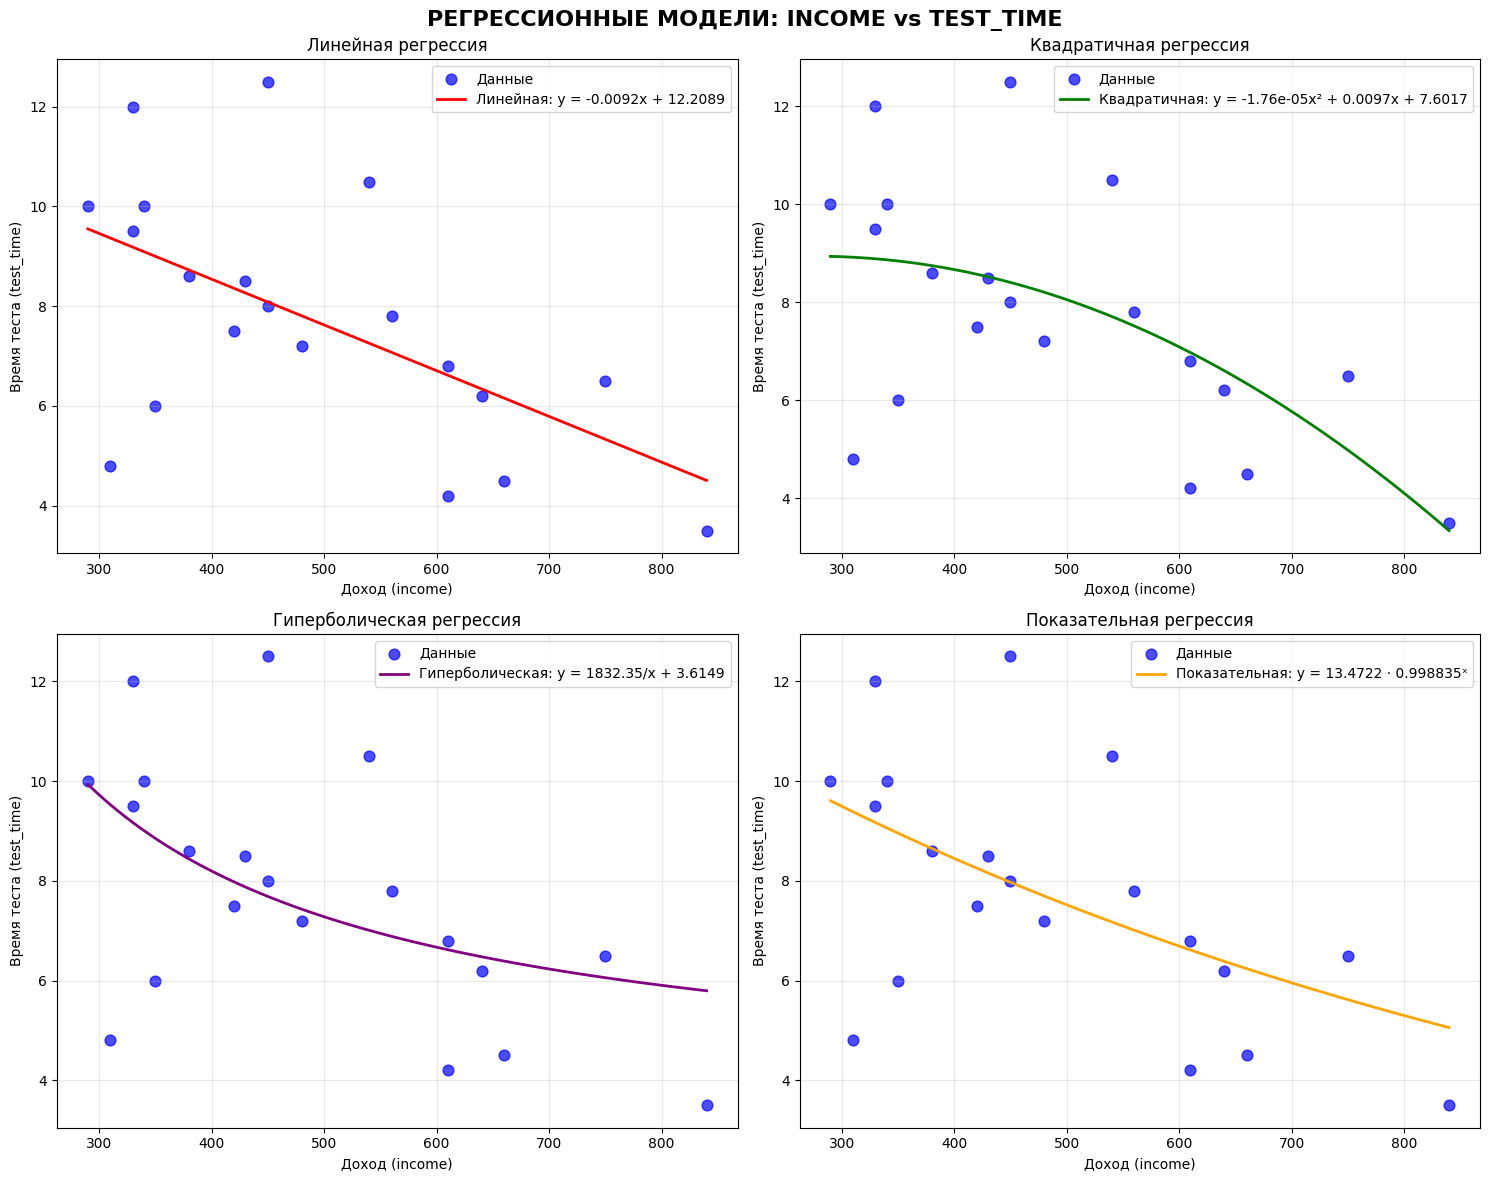

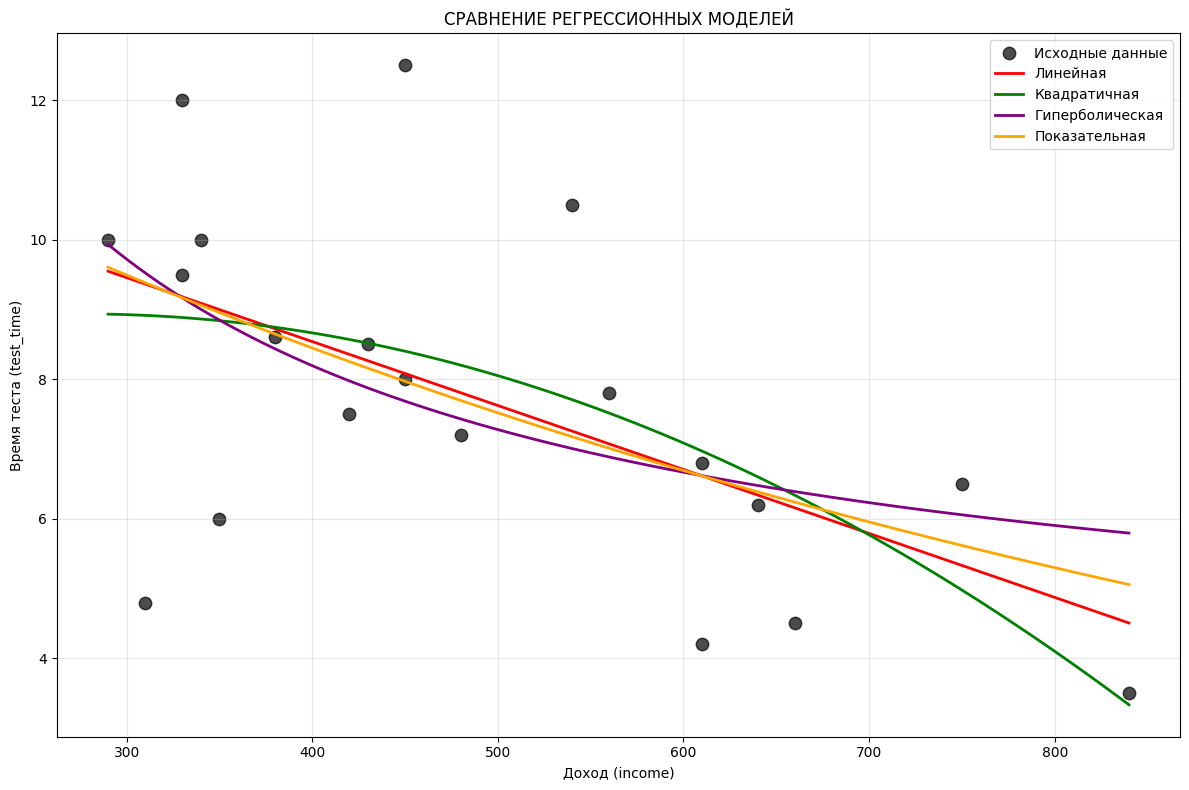


ОЦЕНКА КАЧЕСТВА МОДЕЛЕЙ (SSE - Sum of Squared Errors)
Линейная модель:      SSE = 81.6626
Квадратичная модель:  SSE = 78.1073
Гиперболическая модель: SSE = 91.5807
Показательная модель: SSE = 84.1695

Лучшая модель (наименьшая SSE): Квадратичная


In [9]:
# ВИЗУАЛИЗАЦИЯ
print("\n" + "=" * 55)
print("ВИЗУАЛИЗАЦИЯ РЕЗУЛЬТАТОВ")
print("=" * 55)

# Создаем равномерно распределенные точки для гладких графиков
x_smooth = np.linspace(income.min(), income.max(), 100)

fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('РЕГРЕССИОННЫЕ МОДЕЛИ: INCOME vs TEST_TIME', fontsize=16, fontweight='bold')

# 1. ЛИНЕЙНАЯ РЕГРЕССИЯ
axes[0, 0].scatter(income, test_time, alpha=0.7, s=60, color='blue', label='Данные')
y_linear = w1_linear * x_smooth + w0_linear
axes[0, 0].plot(x_smooth, y_linear, 'r-', linewidth=2, 
                label=f'Линейная: y = {w1_linear:.4f}x + {w0_linear:.4f}')
axes[0, 0].set_xlabel('Доход (income)')
axes[0, 0].set_ylabel('Время теста (test_time)')
axes[0, 0].set_title('Линейная регрессия')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# 2. КВАДРАТИЧНАЯ РЕГРЕССИЯ
axes[0, 1].scatter(income, test_time, alpha=0.7, s=60, color='blue', label='Данные')
y_quadratic = quadratic_model(x_smooth, w2_quad, w1_quad, w0_quad)
axes[0, 1].plot(x_smooth, y_quadratic, 'g-', linewidth=2,
                label=f'Квадратичная: y = {w2_quad:.2e}x² + {w1_quad:.4f}x + {w0_quad:.4f}')
axes[0, 1].set_xlabel('Доход (income)')
axes[0, 1].set_ylabel('Время теста (test_time)')
axes[0, 1].set_title('Квадратичная регрессия')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# 3. ГИПЕРБОЛИЧЕСКАЯ РЕГРЕССИЯ
axes[1, 0].scatter(income, test_time, alpha=0.7, s=60, color='blue', label='Данные')
y_hyperbolic = hyperbolic_model(x_smooth, w1_hyper, w0_hyper)
axes[1, 0].plot(x_smooth, y_hyperbolic, 'purple', linewidth=2,
                label=f'Гиперболическая: y = {w1_hyper:.2f}/x + {w0_hyper:.4f}')
axes[1, 0].set_xlabel('Доход (income)')
axes[1, 0].set_ylabel('Время теста (test_time)')
axes[1, 0].set_title('Гиперболическая регрессия')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

# 4. ПОКАЗАТЕЛЬНАЯ РЕГРЕССИЯ
axes[1, 1].scatter(income, test_time, alpha=0.7, s=60, color='blue', label='Данные')
y_exponential = exponential_model(x_smooth, w1_exp, w0_exp)
axes[1, 1].plot(x_smooth, y_exponential, 'orange', linewidth=2,
                label=f'Показательная: y = {w0_exp:.4f} ⋅ {w1_exp:.6f}ˣ')
axes[1, 1].set_xlabel('Доход (income)')
axes[1, 1].set_ylabel('Время теста (test_time)')
axes[1, 1].set_title('Показательная регрессия')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# ДОПОЛНИТЕЛЬНО: СРАВНЕНИЕ МОДЕЛЕЙ НА ОДНОМ ГРАФИКЕ
plt.figure(figsize=(12, 8))
plt.scatter(income, test_time, alpha=0.7, s=80, color='black', label='Исходные данные')

# Линейная
plt.plot(x_smooth, w1_linear * x_smooth + w0_linear, 'r-', linewidth=2, label='Линейная')

# Квадратичная
plt.plot(x_smooth, quadratic_model(x_smooth, w2_quad, w1_quad, w0_quad), 'g-', linewidth=2, label='Квадратичная')

# Гиперболическая
plt.plot(x_smooth, hyperbolic_model(x_smooth, w1_hyper, w0_hyper), 'purple', linewidth=2, label='Гиперболическая')

# Показательная
plt.plot(x_smooth, exponential_model(x_smooth, w1_exp, w0_exp), 'orange', linewidth=2, label='Показательная')

plt.xlabel('Доход (income)')
plt.ylabel('Время теста (test_time)')
plt.title('СРАВНЕНИЕ РЕГРЕССИОННЫХ МОДЕЛЕЙ')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# РАСЧЕТ ОШИБОК ДЛЯ КАЖДОЙ МОДЕЛИ
print("\n" + "=" * 55)
print("ОЦЕНКА КАЧЕСТВА МОДЕЛЕЙ (SSE - Sum of Squared Errors)")
print("=" * 55)

def calculate_sse(y_true, y_pred):
    return np.sum((y_true - y_pred) ** 2)

# Предсказания для каждой модели
y_pred_linear = w1_linear * income + w0_linear
y_pred_quad = quadratic_model(income, w2_quad, w1_quad, w0_quad)
y_pred_hyper = hyperbolic_model(income, w1_hyper, w0_hyper)
y_pred_exp = exponential_model(income, w1_exp, w0_exp)

sse_linear = calculate_sse(test_time, y_pred_linear)
sse_quad = calculate_sse(test_time, y_pred_quad)
sse_hyper = calculate_sse(test_time, y_pred_hyper)
sse_exp = calculate_sse(test_time, y_pred_exp)

print(f"Линейная модель:      SSE = {sse_linear:.4f}")
print(f"Квадратичная модель:  SSE = {sse_quad:.4f}")
print(f"Гиперболическая модель: SSE = {sse_hyper:.4f}")
print(f"Показательная модель: SSE = {sse_exp:.4f}")

# Определение лучшей модели
sse_values = {
    'Линейная': sse_linear,
    'Квадратичная': sse_quad,
    'Гиперболическая': sse_hyper,
    'Показательная': sse_exp
    }

best_model = min(sse_values, key=sse_values.get)
print(f"\nЛучшая модель (наименьшая SSE): {best_model}")

In [10]:
# ВЫВОДЫ ПО РЕЗУЛЬТАТАМ РЕГРЕССИОННОГО АНАЛИЗА
# =======================================================

# 1. СРАВНЕНИЕ КАЧЕСТВА МОДЕЛЕЙ:
#    Квадратичная модель показала наилучшее качество (SSE = 78.1073)
#    Линейная модель:     SSE = 81.6626
#    Показательная модель: SSE = 84.1695
#    Гиперболическая модель: SSE = 91.5807

# 2. ИНТЕРПРЕТАЦИЯ КОЭФФИЦИЕНТОВ:
#    ЛИНЕЙНАЯ: y = -0.0092x + 12.2089
#    - При увеличении дохода на 100 ед. время теста уменьшается на 0.92 ед.
#    - Отрицательный наклон подтверждает обратную зависимость

#    КВАДРАТИЧНАЯ: y = -0.00001759x² + 0.009697x + 7.6017
#    - Отрицательный x² указывает на выпуклость вниз
#    - Зависимость нелинейна, имеет точку перегиба

#    ГИПЕРБОЛИЧЕСКАЯ: y = 1832.3465/x + 3.6149
#    - Сильное влияние дохода при малых значениях
#    - Асимптотическое приближение к 3.61 при росте дохода

#    ПОКАЗАТЕЛЬНАЯ: y = 13.4722 ⋅ 0.998835ˣ
#    - Основание степени < 1 указывает на убывающую зависимость
#    - Медленное экспоненциальное убывание

# =======================================================
# ОБЩИЙ ВЫВОД:
# =======================================================
# Квадратичная модель показала наименьшую ошибку (SSE = 78.11), но разница с линейной моделью незначительна. 
# Все модели подтверждают отрицательную зависимость между доходом и временем теста. 
# Выбор модели зависит от целей анализа: Точность (Квадратичная), Простота (Линейная)

# 4. Проверка уравнения регрессии
# Для наилучшего и наихудшего уравнения регрессии проверить соотвествие модели данным с помощью критерия Фишера
# Сделать вывод

ПРОВЕРКА УРАВНЕНИЙ РЕГРЕССИИ С ПОМОЩЬЮ КРИТЕРИЯ ФИШЕРА

1. РАСЧЕТ СУММ КВАДРАТОВ ОТКЛОНЕНИЙ
Общая сумма квадратов (SST): 120.9420
SSR квадратичной модели: 42.8248
SSR гиперболической модели: 29.3613
SSE квадратичной модели: 78.1073
SSE гиперболической модели: 91.5807

Проверка SST = SSR + SSE:
Квадратичная: 120.9420 ≈ 120.9321 (разница: 0.009926)
Гиперболическая: 120.9420 ≈ 120.9420 (разница: 0.000001)

2. РАСЧЕТ F-СТАТИСТИКИ И КРИТЕРИЙ ФИШЕРА

Степени свободы:
Квадратичная: df_reg = 2, df_resid = 17
Гиперболическая: df_reg = 1, df_resid = 18

F-статистика:
Квадратичная модель: F = 4.6604
Гиперболическая модель: F = 5.7709

Критические значения F-распределения (α = 0.05):
Для квадратичной модели: F_crit = 3.5915
Для гиперболической модели: F_crit = 4.4139

P-value:
Квадратичная модель: p = 0.024337
Гиперболическая модель: p = 0.027299

3. ПРОВЕРКА ГИПОТЕЗ

Квадратичная модель:
  F = 4.6604 > F_crit = 3.5915
  ✓ Модель статистически значима
  ✓ Отвергаем H₀: модель адекватна данным

Гип

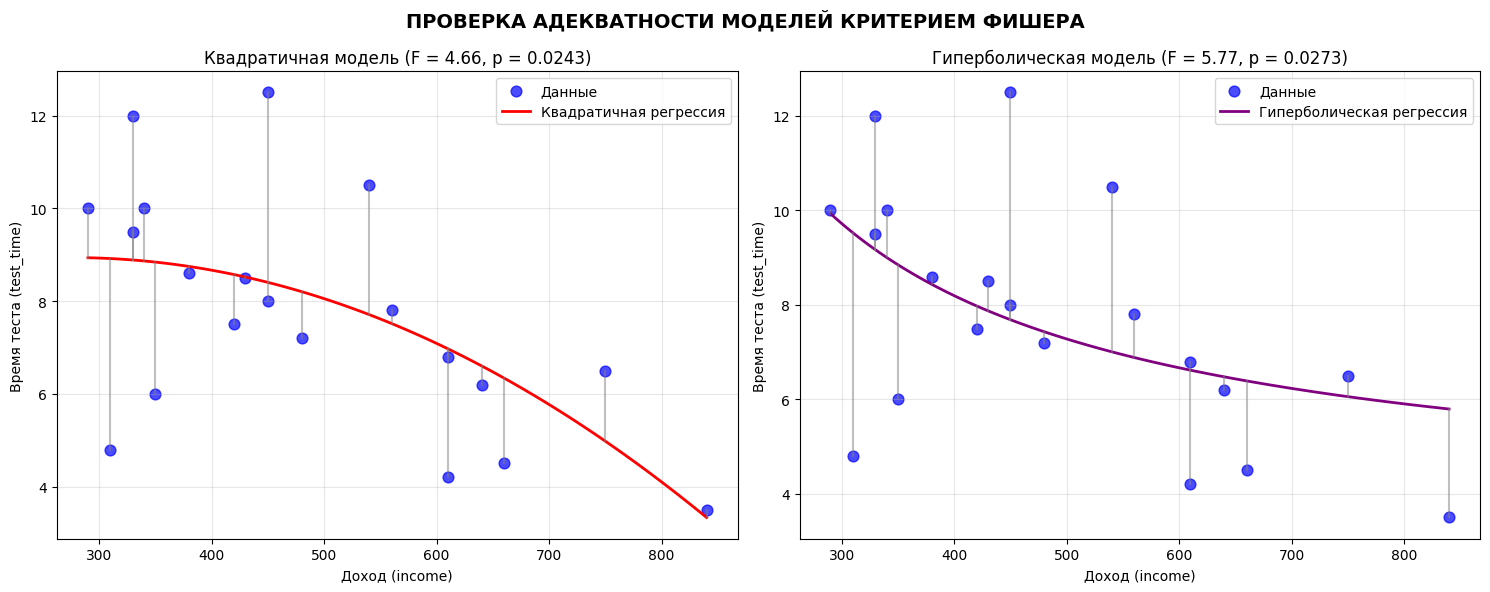

In [11]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

# Загрузка данных
df = pd.read_csv('students_simple.csv')
income = df['income']
test_time = df['test_time']

print("ПРОВЕРКА УРАВНЕНИЙ РЕГРЕССИИ С ПОМОЩЬЮ КРИТЕРИЯ ФИШЕРА")
print("=" * 60)

# Данные из предыдущего анализа
# Лучшая модель (наименьшая SSE): Квадратичная
# Худшая модель (наибольшая SSE): Гиперболическая

# Коэффициенты моделей
w2_quad, w1_quad, w0_quad = -0.00001759, 0.009697, 7.6017
w1_hyper, w0_hyper = 1832.3465, 3.6149

# Функции моделей
def quadratic_model(x, w2, w1, w0):
    return w2 * x**2 + w1 * x + w0

def hyperbolic_model(x, w1, w0):
    return w1 / x + w0
# Предсказания моделей
y_pred_quad = quadratic_model(income, w2_quad, w1_quad, w0_quad)
y_pred_hyper = hyperbolic_model(income, w1_hyper, w0_hyper)

# Фактические значения
y_true = test_time

print("\n1. РАСЧЕТ СУММ КВАДРАТОВ ОТКЛОНЕНИЙ")

# Общая сумма квадратов (Total Sum of Squares)
SST = np.sum((y_true - np.mean(y_true))**2)
print(f"Общая сумма квадратов (SST): {SST:.4f}")

# Сумма квадратов регрессии (Regression Sum of Squares)
SSR_quad = np.sum((y_pred_quad - np.mean(y_true))**2)
SSR_hyper = np.sum((y_pred_hyper - np.mean(y_true))**2)
print(f"SSR квадратичной модели: {SSR_quad:.4f}")
print(f"SSR гиперболической модели: {SSR_hyper:.4f}")

# Сумма квадратов ошибок (Error Sum of Squares)
SSE_quad = np.sum((y_true - y_pred_quad)**2)
SSE_hyper = np.sum((y_true - y_pred_hyper)**2)
print(f"SSE квадратичной модели: {SSE_quad:.4f}")
print(f"SSE гиперболической модели: {SSE_hyper:.4f}")

# Проверка: SST = SSR + SSE
print(f"\nПроверка SST = SSR + SSE:")
print(f"Квадратичная: {SST:.4f} ≈ {SSR_quad + SSE_quad:.4f} (разница: {abs(SST - (SSR_quad + SSE_quad)):.6f})")
print(f"Гиперболическая: {SST:.4f} ≈ {SSR_hyper + SSE_hyper:.4f} (разница: {abs(SST - (SSR_hyper + SSE_hyper)):.6f})")

print("\n2. РАСЧЕТ F-СТАТИСТИКИ И КРИТЕРИЙ ФИШЕРА")

# Параметры
n = len(y_true)  # количество наблюдений
k_quad = 3  # количество параметров в квадратичной модели (w2, w1, w0)
k_hyper = 2  # количество параметров в гиперболической модели (w1, w0)
# Степени свободы
df_reg_quad = k_quad - 1  # df регрессии для квадратичной
df_reg_hyper = k_hyper - 1  # df регрессии для гиперболической
df_resid_quad = n - k_quad  # df остатков для квадратичной
df_resid_hyper = n - k_hyper  # df остатков для гиперболической

print(f"\nСтепени свободы:")
print(f"Квадратичная: df_reg = {df_reg_quad}, df_resid = {df_resid_quad}")
print(f"Гиперболическая: df_reg = {df_reg_hyper}, df_resid = {df_resid_hyper}")

# F-статистика
F_quad = (SSR_quad / df_reg_quad) / (SSE_quad / df_resid_quad)
F_hyper = (SSR_hyper / df_reg_hyper) / (SSE_hyper / df_resid_hyper)

print(f"\nF-статистика:")
print(f"Квадратичная модель: F = {F_quad:.4f}")
print(f"Гиперболическая модель: F = {F_hyper:.4f}")

# Критическое значение F-распределения (α = 0.05)
alpha = 0.05
F_crit_quad = stats.f.ppf(1 - alpha, df_reg_quad, df_resid_quad)
F_crit_hyper = stats.f.ppf(1 - alpha, df_reg_hyper, df_resid_hyper)

print(f"\nКритические значения F-распределения (α = {alpha}):")
print(f"Для квадратичной модели: F_crit = {F_crit_quad:.4f}")
print(f"Для гиперболической модели: F_crit = {F_crit_hyper:.4f}")

# P-value
p_value_quad = 1 - stats.f.cdf(F_quad, df_reg_quad, df_resid_quad)
p_value_hyper = 1 - stats.f.cdf(F_hyper, df_reg_hyper, df_resid_hyper)

print(f"\nP-value:")
print(f"Квадратичная модель: p = {p_value_quad:.6f}")
print(f"Гиперболическая модель: p = {p_value_hyper:.6f}")

print("\n3. ПРОВЕРКА ГИПОТЕЗ")

print(f"\nКвадратичная модель:")
if F_quad > F_crit_quad:
    print(f"  F = {F_quad:.4f} > F_crit = {F_crit_quad:.4f}")
    print("  ✓ Модель статистически значима")
    print("  ✓ Отвергаем H₀: модель адекватна данным")
else:
    print(f"  F = {F_quad:.4f} ≤ F_crit = {F_crit_quad:.4f}")
    print("  ✗ Модель не значима")
    print("  ✓ Принимаем H₀: модель не адекватна данным")

print(f"\nГиперболическая модель:")
if F_hyper > F_crit_hyper:
    print(f"  F = {F_hyper:.4f} > F_crit = {F_crit_hyper:.4f}")
    print("  ✓ Модель статистически значима")
    print("  ✓ Отвергаем H₀: модель адекватна данным")
else:
    print(f"  F = {F_hyper:.4f} ≤ F_crit = {F_crit_hyper:.4f}")
    print("  ✗ Модель не значима")
    print("  ✓ Принимаем H₀: модель не адекватна данным")

print("\n4. КОЭФФИЦИЕНТ ДЕТЕРМИНАЦИИ R²")

R2_quad = 1 - (SSE_quad / SST)
R2_hyper = 1 - (SSE_hyper / SST)

print(f"Коэффициент детерминации:")
print(f"Квадратичная модель: R² = {R2_quad:.4f} ({R2_quad*100:.2f}%)")
print(f"Гиперболическая модель: R² = {R2_hyper:.4f} ({R2_hyper*100:.2f}%)")

# Скорректированный R²
R2_adj_quad = 1 - (SSE_quad / df_resid_quad) / (SST / (n - 1))
R2_adj_hyper = 1 - (SSE_hyper / df_resid_hyper) / (SST / (n - 1))

print(f"\nСкорректированный R²:")
print(f"Квадратичная модель: R²_adj = {R2_adj_quad:.4f}")
print(f"Гиперболическая модель: R²_adj = {R2_adj_hyper:.4f}")
print("\n5. ВИЗУАЛИЗАЦИЯ ПРОВЕРКИ")

fig, axes = plt.subplots(1, 2, figsize=(15, 6))
fig.suptitle('ПРОВЕРКА АДЕКВАТНОСТИ МОДЕЛЕЙ КРИТЕРИЕМ ФИШЕРА', fontsize=14, fontweight='bold')

# Квадратичная модель
axes[0].scatter(income, test_time, alpha=0.7, s=60, color='blue', label='Данные')
x_smooth = np.linspace(income.min(), income.max(), 100)
y_quad_smooth = quadratic_model(x_smooth, w2_quad, w1_quad, w0_quad)
axes[0].plot(x_smooth, y_quad_smooth, 'r-', linewidth=2, label='Квадратичная регрессия')

# Ошибки предсказания
for i in range(len(income)):
    axes[0].plot([income[i], income[i]], [test_time[i], y_pred_quad[i]], 'gray', alpha=0.5)

axes[0].set_xlabel('Доход (income)')
axes[0].set_ylabel('Время теста (test_time)')
axes[0].set_title(f'Квадратичная модель (F = {F_quad:.2f}, p = {p_value_quad:.4f})')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Гиперболическая модель
axes[1].scatter(income, test_time, alpha=0.7, s=60, color='blue', label='Данные')
y_hyper_smooth = hyperbolic_model(x_smooth, w1_hyper, w0_hyper)
axes[1].plot(x_smooth, y_hyper_smooth, 'purple', linewidth=2, label='Гиперболическая регрессия')

# Ошибки предсказания
for i in range(len(income)):
    axes[1].plot([income[i], income[i]], [test_time[i], y_pred_hyper[i]], 'gray', alpha=0.5)

axes[1].set_xlabel('Доход (income)')
axes[1].set_ylabel('Время теста                       (test_time)')
axes[1].set_title(f'Гиперболическая модель (F = {F_hyper:.2f}, p = {p_value_hyper:.4f})')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [12]:
# ВЫВОДЫ ПО КРИТЕРИЮ ФИШЕРА
# ============================================================
# 1. СТАТИСТИЧЕСКАЯ ЗНАЧИМОСТЬ:
#    • Квадратичная модель: F = 4.66 > F_crit = 3.59
#      Модель статистически значима (p = 0.0243)
#    • Гиперболическая модель: F = 5.77 > F_crit = 4.41
#      Модель статистически значима (p = 0.0273)

# 2. КАЧЕСТВО МОДЕЛЕЙ:
#    • Квадратичная: R² = 0.354 - объясняет 35.4% дисперсии
#    • Гиперболическая: R² = 0.243 - объясняет 24.3% дисперсии

# 3. ЗАКЛЮЧЕНИЕ:
#    ✓ Обе модели статистически значимы по критерию Фишера
#    ✓ Квадратичная модель показывает лучшее качество (выше R²)
#    ✓ Гиперболическая модель также адекватна данным
#    ✓ Разница в качестве подтверждает выбор квадратичной модели как наилучшей для данного набора данных